## DAB 300 Machine Learning 2
### Prediction of Credit Card Approval using Machine Learning
#### Date - 16 Dec 2020
### Group 45
- Hari Sai Palem - 0747511
- Manoj Reddy Lenkala - 0753802
- Naveen Kumar Tedla - 0753623
- Sunil Kumar Vidam - 0735027

### Academic integrity statement


We, Hari Sai Palem (0747511), Manoj Reddy Lenkala (0753802), Naveen Kumar Tedla (0753623), Sunil Kumar Vidam (0735027) of Group 45, hereby state that in preparing this project for submission for grading, we have abided by the College’s academic integrity policies, and that all work presented is our own.

### Objective
- The objective of this study is to classify the good applicants i.e., who pay the debts in time, and bad applicants i.e., who pay the debts past the due time, based on their features for credit card approval.

### Libraries

In [1]:
import pandas as pd # importing pandas for data preprocessing and data manipulation
import numpy as np # importing numpy for linear algebra
# to plot graphs importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # importing warnings to ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# By using pandas to read the data from csv file
info = pd.read_csv("application_record.csv") # "application_record.csv" contains the information of applicant
record = pd.read_csv("credit_record.csv") # "credit_record.csv" contains the credit histoy status

##### Columns Description
- ID: each row unique ID
- CODE_GENDER: Applicants Gender. M is male and F is female.
- FLAG_OWN_CAR: Does applicant own car. Y is Yes and N is NO.
- FLAG_OWN_REALTY: Does the applicant own a property. Y is Yes and N is No.
- CNT_CHILDREN: Childern count for applicant.
- AMT_INCOME_TOTAL: Total income amount.
- NAME_INCOME_TYPE: Income type (5 types in total).
- NAME_EDUCATION_TYPE: Education type (5 types in total).
- NAME_FAMILY_STATUS: Family status type (6 types in total).
- DAYS_BIRTH: Days since birth (Negative values).
- DAYS_EMPLOYED: Days since employment (Negative values). This column has error values.
- FLAG_MOBIL: Do applicant have mobile. 1 is True and 0 is False.
- FLAG_WORK_PHONE: Do applicant have work phone. 1 is True and 0 is False.
- FLAG_PHONE: Do applicant have phone. 1 is True and 0 is False.
- FLAG_EMAIL: Do applicant have email. 1 is True and 0 is False.
- OCCUPATION_TYPE: Occupation Tpye (19 types in total). This column has missing values.
- CNT_FAM_MEMBERS: Family members count

In [3]:
info.head() # Displaying the first 5 rows of the dataframe by using head function

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
info.shape # Checking the shape of "info" dataframe

(438557, 18)

In [5]:
record.head() # Displaying the first 5 rows of "record" dataframe

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
record.shape # Checking the shape of "record" dataframe

(1048575, 3)

### Data Preparation

In [7]:
# Converting the negative values of 'MONTHS_BALANCE' column in record dataframe to positive
record['MONTHS_BALANCE'] = record['MONTHS_BALANCE'].apply(lambda x : x*(-1))

In [8]:
# By using groupby function and defining the maximum month balance of each applicant
record1 = record.groupby(["ID"]).agg({'MONTHS_BALANCE': max})

In [9]:
record1.shape # Displaying the new record dataframe  

(45985, 1)

In [10]:
# To know the applicant credit record, merging the applicant_record.csv (info dataframe) with 
# the credit_record.csv (record1 data frame) into new dataframe "df"
df = pd.merge(info,record1,on="ID")

In [11]:
df.shape #checking the shape of dataframe

(36457, 19)

In [12]:
df.head()  # Displaying first 5 rows of "df" dataframe

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [13]:
# In the record dataframe replacing 'C's and 'X's in the STATUS to -1
record['STATUS'][record["STATUS"] == 'C'] = -1 
record['STATUS'][record["STATUS"] == 'X'] = -1
record.head() # Checking for first 5 rows

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [14]:
# In the record dataframe converting the dtype of 'STATUS' to int
record['STATUS'] = record.STATUS.apply(lambda x : int(x))

In [15]:
# Droping the duplicates from 'ID'
record.drop_duplicates(subset = ['ID'],inplace = True)
record.shape

(45985, 3)

In [16]:
# Converting applicants 'Status' into binary values
record['TARGET'] = record.STATUS.apply(lambda x : 0 if x>=0 else 1)
record.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
record.head() # Checking the first 5 rows

,ID,TARGET
0,5001711,1
4,5001712,1
23,5001713,1
45,5001714,1
60,5001715,1


In [17]:
df = pd.merge(df, record, on = "ID") # Merging the TARGET with the features

In [18]:
df.head() # Checking the first 5 rows

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [19]:
df.shape # Checking shape of dataframe

(36457, 20)

In [20]:
df.isnull().sum() # Checking for missing values

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
TARGET                     0
dtype: int64

In [21]:
df['OCCUPATION_TYPE'].mode() # Checking mode() of the feature

0    Laborers
dtype: object

In [22]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Laborers') # Filling the missing values with the mode

In [23]:
df.isnull().sum() # Checking for missing values again

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
TARGET                 0
dtype: int64

In [24]:
df.head() # Checking the first 5 rows

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [25]:
df = df.drop(['ID'],1) # Dropping ID column

In [26]:
df.duplicated().sum() # Checking for duplicates

3581

In [27]:
df = df.drop_duplicates() # Dropping duplicates

In [28]:
df.shape

(32876, 19)

### EDA

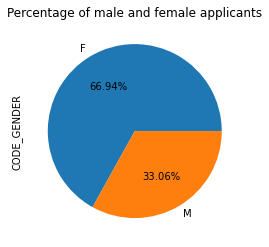

In [29]:
# Plotting a pie chart for gender distribution
Gender_proportion = df.CODE_GENDER.value_counts(normalize = True)
Gender_proportion.plot.pie(autopct="%.2f%%")
plt.title("Percentage of male and female applicants")
plt.show()

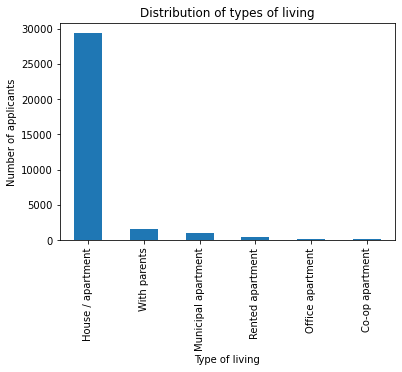

In [30]:
# Plotting bar graph for housing distribution
Housing = df.NAME_HOUSING_TYPE.value_counts()
Housing.plot.bar()
plt.title("Distribution of types of living")
plt.xlabel("Type of living")
plt.ylabel("Number of applicants")
plt.show()

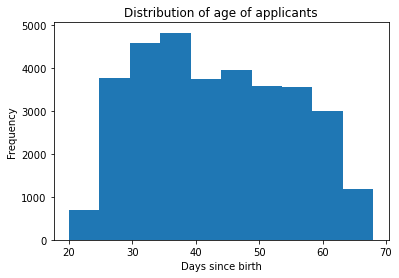

In [31]:
# Plotting histogram for age distribution
df['DAYS_BIRTH'] =-(df['DAYS_BIRTH'])//365  # Converting the number of days since birth to years
df['DAYS_BIRTH'].plot.hist()
plt.title("Distribution of age of applicants")
plt.xlabel("Days since birth")
plt.show()

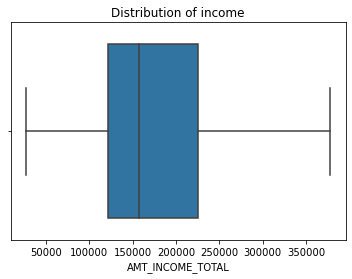

In [32]:
# Plotting boxplot for Income distribution 
sns.boxplot(df.AMT_INCOME_TOTAL, showfliers = False)
plt.title("Distribution of income")
plt.show()

In [33]:
# Encoding Binary features
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['F','M'],[0,1])
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

In [34]:
# Encoding Categorical features
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace(['Student','Commercial associate','State servant','Working','Pensioner'],
                                                        [0,1,2,3,4])
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special',
                                                               'Incomplete higher','Higher education','Academic degree'],
                                                             [0,1,2,3,4])
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace(['Widow','Separated','Single / not married',
                                                             'Civil marriage','Married'],
                                                            [0,1,2,3,4])
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace(['House / apartment','Co-op apartment','Municipal apartment',
                                                           'With parents','Office apartment','Rented apartment'],
                                                         [5,4,3,2,1,0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(['Low-skill Laborers','Laborers','Cleaning staff','Security staff',
                                                       'Cooking staff','Drivers','Sales staff','Waiters/barmen staff',
                                                       'Core staff','Private service staff','HR staff','Secretaries',
                                                       'IT staff','Realty agents','Medicine staff','Accountants',
                                                       'Managers','High skill tech staff'],
                                                     [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [35]:
# Correcting 'DAYS_EMPLOYED' into appropriate Total number of days and then converting into years 
df['DAYS_EMPLOYED'] = -(df['DAYS_EMPLOYED'].apply(lambda x : 0 if x>=0 else x))//365
# Renaming 'DAYS_BIRTH' as 'Age' and 'DAYS_EMPLOYED' as Experience.
df = df.rename(columns={'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'EXPERIENCE'}, index={'ONE': 'one'})

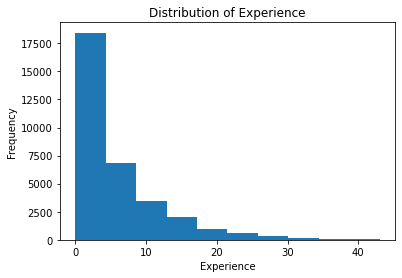

In [36]:
# Plotting histogram for Experience distribution
df['EXPERIENCE'].plot.hist()
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.show()

In [37]:
df.shape # Checking shape of dataframe

(32876, 19)

In [38]:
df.head() # Displaying first 5 rows

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,EXPERIENCE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,1,1,1,0,427500.0,3,3,3,0,32,12,1,1,0,0,1,2.0,15,1
1,1,1,1,0,427500.0,3,3,3,0,32,12,1,1,0,0,1,2.0,14,1
2,1,1,1,0,112500.0,3,1,4,5,58,3,1,0,0,0,3,2.0,29,1
3,0,0,1,0,270000.0,1,1,2,5,52,8,1,0,1,1,6,1.0,4,0
4,0,0,1,0,270000.0,1,1,2,5,52,8,1,0,1,1,6,1.0,26,1


<AxesSubplot:>

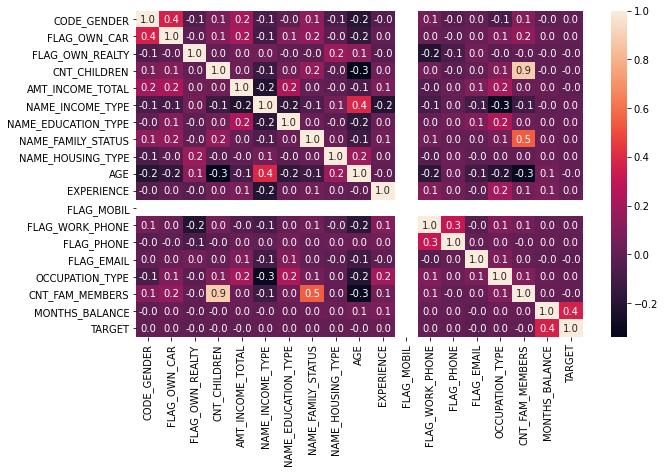

In [39]:
# Plotting Correlation matrix to get relationship between all features.
corr_mat = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_mat, xticklabels = corr_mat.columns.values, yticklabels = corr_mat.columns.values, annot= True, fmt ='.1f')

In [40]:
# Checking count for 'TARGET' values
df['TARGET'].value_counts() 

1    24612
0     8264
Name: TARGET, dtype: int64

#### Selecting features and Target variables

In [41]:
# Importing the required packages for building the model 
from sklearn.model_selection import train_test_split
from collections import Counter
# Creating Feature set and Tartget set
X = df.drop(["TARGET"],1)
y = df["TARGET"]
# Displaying shape of Target variable
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 24612, 0: 8264})


#### Over Sampling

In [42]:
# Reference: 
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC
from imblearn.over_sampling import SMOTENC
# Using SMOTNC to balance minority class in target variable
over_sample = SMOTENC(random_state=0, categorical_features=True)
X,y = over_sample.fit_resample(X,y)
# Displaying shape of Target variable
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 24612, 0: 24612})


### Splitting the data into train and test

In [43]:
# Splitting the data Training and Testing sets using train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling the data

In [44]:
# Scaling the data by using MinMaxScaler and fitting the train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# Scaling X_train and X_test using MinMaxScaler 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models

#### Decision tree classifier with default parameters

In [45]:
# Importing 'DecisionTreeClassifier' from sklearn
from sklearn.tree import DecisionTreeClassifier 
# Training Decision Tree Classifier 
dtc = DecisionTreeClassifier(random_state=0).fit(X_train_scaled,y_train) 
# Predicting the target using the model
dtc_pred = dtc.predict(X_test_scaled)

In [46]:
# Evaluating and displaying Train accuracy of the model
dtc_acc_train = dtc.score(X_train_scaled, y_train)*100
print("Train accuracy:", dtc_acc_train)

Train accuracy: 98.78108239882984


In [47]:
# Evaluating the testing accuracy results of the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
dt_acc = accuracy_score(y_test, dtc_pred)*100
# Evaluating and displaying Accuracy,Precision,Recall and F1-Score
print("---Metrics---")
print("accuracy: ", accuracy_score(y_test, dtc_pred))
print("Precision: ", precision_score(y_test, dtc_pred))
print("Recall: ", recall_score(y_test, dtc_pred))
print("f1_Score: ", f1_score(y_test, dtc_pred))

---Metrics---
accuracy:  0.7640175524134568
Precision:  0.7705000841892574
Recall:  0.748079123753474
f1_Score:  0.7591240875912408


<AxesSubplot:title={'center':'Confusion Matrix'}>

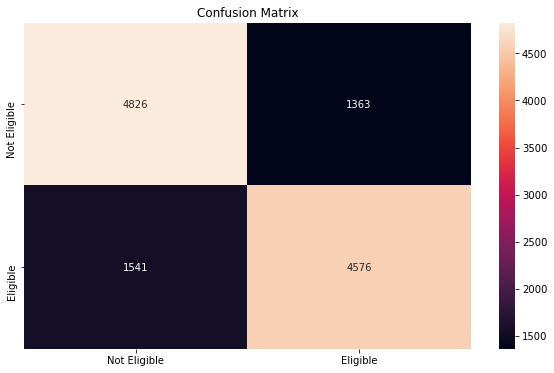

In [48]:
# Plotting Confusion matrix to analyze model performance
cnf_mtrx = confusion_matrix(y_test, dtc_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Decision Tree - Hyper Parameter

In [49]:
# Create a hyper parameter grid to use in the GridSearch for a DecisionTreeclassifier:
param_grid_dt={'max_depth':[2,3,4,10],
           'max_leaf_nodes':[6,10,20,30],
            'min_samples_split':[20,30,40,50]}

In [50]:
# Applying GridSearch on a DecisionTreeClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid_search_dt = GridSearchCV(DecisionTreeClassifier(),param_grid_dt,cv=5,return_train_score=True)
grid_search_dt.fit(X_train_scaled,y_train) 
# Evaluating and displaying the training accuracy of the model
dt_grid_acc_train = grid_search_dt.score(X_train_scaled, y_train)*100
print("Train accuracy:", dt_grid_acc_train)
# Evaluating and displaying the testing accuracy of the model
dt_bp_acc = grid_search_dt.score(X_test_scaled, y_test)*100 
print("Test score is "+str(grid_search_dt.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_dt.best_params_))

Train accuracy: 75.97107102226556
Test score is 75.61352185925566
Best parameters:{'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_split': 20}


#### Random Forest classifier with default parameters

Train accuracy: 98.78108239882984
---Metrics---
accuracy:  0.820737851454575
Precision:  0.8156577885391445
Recall:  0.826058525420958
f1_Score:  0.8208252111760884


<AxesSubplot:title={'center':'Confusion Matrix'}>

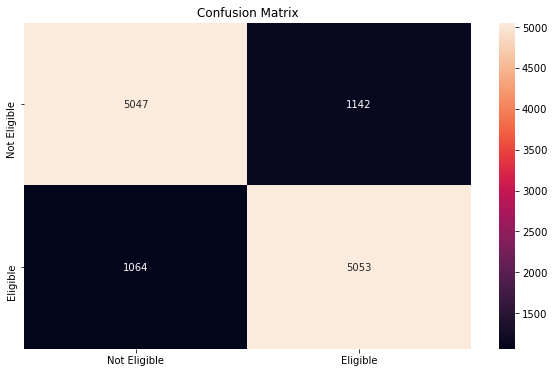

In [51]:
# Importing 'RandomForestClassifier' from sklearn
from sklearn.ensemble import RandomForestClassifier

# Training the model with train data
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train_scaled, y_train)
# Predicting the target using model
rfc_pred = rfc.predict(X_test_scaled)
# Evaluating and displaying training accuracy
rfc_acc_train = rfc.score(X_train_scaled, y_train)*100
print("Train accuracy:", rfc_acc_train)

# Evaluating the testing accuracy of the model
rf_acc = accuracy_score(y_test, rfc_pred)*100
# Evaluating and displaying Accuracy,Precision,Recall and F1-Score 
print("---Metrics---")
print("accuracy: ", accuracy_score(y_test, rfc_pred))
print("Precision: ", precision_score(y_test, rfc_pred))
print("Recall: ", recall_score(y_test, rfc_pred))
print("f1_Score: ", f1_score(y_test, rfc_pred))

# Plotting Confusion matrix to analyze model performance
cnf_mtrx = confusion_matrix(y_test, rfc_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Random Forest - Hyper Parameter

In [52]:
# Create a hyper parameter grid to use in the GridSearch for a RandomForest:
param_grid_rf={
           'max_depth':[30,31,32],
           'max_leaf_nodes':[20,21,22],
            'min_samples_split':[50,51,53] }

In [53]:
# Applying GridSearch on a RandomForestClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid_rf,cv=5,n_jobs=-1,return_train_score=True)
# Training the model with train data
grid_search_rf.fit(X_train_scaled,y_train)
# Evaluating and displaying training accuracy for the model
rfc_grid_acc_train = grid_search_rf.score(X_train_scaled, y_train)*100
print("Train accuracy:", rfc_grid_acc_train)
# Evaluating and displaying testing accuracy for the model
rf_bp_acc = grid_search_rf.score(X_test_scaled, y_test)*100 # Evaluate the model
print("Test score is "+str(grid_search_rf.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_rf.best_params_))

Train accuracy: 76.49114253209817
Test score is 76.0279538436535
Best parameters:{'max_depth': 30, 'max_leaf_nodes': 22, 'min_samples_split': 50}


#### Logistic Regression

Train accuracy: 73.1052603066255
---Metrics---
accuracy: 0.7257
Precision: 0.7344
Recall: 0.7023
f1_Score: 0.7180


<AxesSubplot:title={'center':'Confusion Matrix'}>

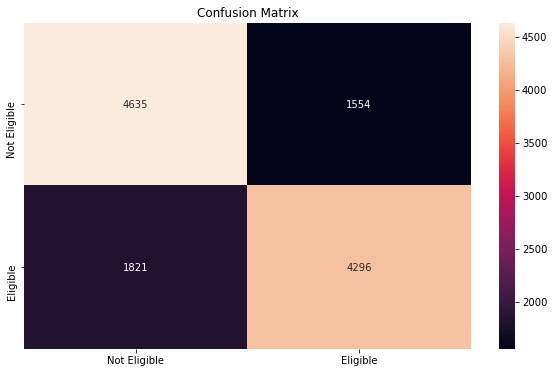

In [54]:
# Importing Logistic Regression classifier from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting and Training the model with train data
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)

# Predicting the target using model
lr_pred = classifier.predict(X_test_scaled)

# Evaluating and displaying training accuracy
lr_acc_train = classifier.score(X_train_scaled, y_train)*100
print("Train accuracy:", lr_acc_train)

# Evaluating the testing accuracy of the model
lr_acc = accuracy_score(y_test, lr_pred)*100
# Evaluating and displaying performance metrics like Accuracy,Precision,Recall and F1-Score 
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, lr_pred))
print("Precision: %.4f" %precision_score(y_test, lr_pred))
print("Recall: %.4f" %recall_score(y_test, lr_pred))
print("f1_Score: %.4f" %f1_score(y_test, lr_pred))

# Plotting Confusion matrix to analyze model performance
cnf_mtrx = confusion_matrix(y_test, lr_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Logistic Regression - Hyper Parameter

In [55]:
# Applying GridSearch on a logistic Regression with a multiple parameter:
from sklearn.model_selection import GridSearchCV

# Instantiate Logistic Regression Model
clf = LogisticRegression()

# Create a hyper parameter grid to use in the GridSearch for a Logistic Regression:
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

# Fitting and Training the model with train data
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_train_scaled, y_train);

# Evaluating and displaying training accuracy
lr_bp_acc_train = gridsearch.score(X_train_scaled, y_train)*100
print("Train accuracy:", lr_bp_acc_train)

# Getting best hyperparameters from gridsearch
gridsearch.best_params_

# Evaluating and displaying the testing accuracy of the model
lr_bp_acc = gridsearch.score(X_test_scaled,y_test)*100 
print("Test score is "+str(gridsearch.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(gridsearch.best_params_))

Train accuracy: 73.94225039276235
Test score is 73.54948805460751
Best parameters:{'C': 10, 'penalty': 'l2'}


#### Artificial Neural Network

In [56]:
# We have imported all the required packages to create the model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from tensorflow import random
from tensorflow.keras.regularizers import l2
# Setting random seed to '0'
random.set_seed(0)
# Building the neural network with 3 layers with 'sigmoid' acivation in output layers 
network = Sequential([
    Dense(10,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.003)),
    Dense(6,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.003)),
    Dense(1, activation='sigmoid')])

In [57]:
# We have compiled the model using binary_crossentropy loss and Adam() optimizer.
network.compile(loss = 'binary_crossentropy', 
                optimizer = Adam(learning_rate=0.001), 
                metrics = ['accuracy'])

In [58]:
# Finally we fit and training the model using the train data with 10 epochs and 20% validation.
history = network.fit(X_train_scaled,
                      y_train,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

In [59]:
# Evaluating and displaying training accuracy of the model
ann_train_acc = history.history['accuracy']
ann_train_acc = ann_train_acc[9]*100
print('train accuracy:',ann_train_acc)

train accuracy: 72.2083032131195


In [60]:
# Evaluating the testing accuracy of the model
ann_test_loss, ann_test_acc = network.evaluate(X_test_scaled, y_test)

385/385 [==============================] - 0s 959us/step - loss: 0.5772 - accuracy: 0.7207


In [61]:
# Displaying the testing accuracy of the model
ann_test_acc = ann_test_acc*100
print('test_acc:', ann_test_acc)

test_acc: 72.07053303718567


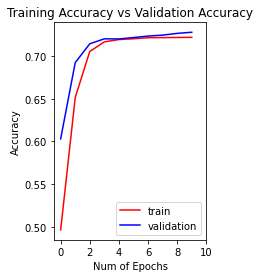

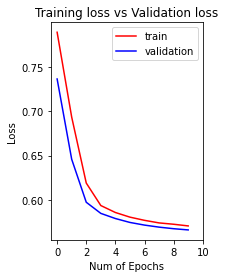

In [62]:
# We have plotted the accuracies and losses of training data and validation data
# Training accuracy Vs Validation accuracy
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r', history.history['val_accuracy'], 'b')
plt.xticks(np.arange(0, 11, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
# Training loss Vs Validation loss
plt.figure(1)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r', history.history['val_loss'], 'b')
plt.xticks(np.arange(0, 11, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Validation loss")
plt.legend(['train','validation'])

In [63]:
# Creating Final output table for all accuracies data by creating lists and then converting it to the dataframe
accuracy = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree with Best Parameters','Random Forest', 
                         'Random Forest with Best Parameters','Logistic Regression',
                         'Logistic Regression with Best Parameters','Artificial Neural Network'],
                         'Training Accuracy':[dtc_acc_train, dt_grid_acc_train, rfc_acc_train, rfc_grid_acc_train, lr_acc_train, lr_bp_acc_train, ann_train_acc],
                         'Testing Accuracy':[dt_acc, dt_bp_acc, rf_acc, rf_bp_acc, lr_acc, lr_bp_acc, ann_test_acc]})
# Displaying and sorting all accuracies by models
accuracy.sort_values(by='Model')

,Model,Training Accuracy,Testing Accuracy
6,Artificial Neural Network,72.208303,72.070533
0,Decision Tree,98.781082,76.401755
1,Decision Tree with Best Parameters,75.971071,75.613522
4,Logistic Regression,73.105260,72.574354
5,Logistic Regression with Best Parameters,73.942250,73.549488
2,Random Forest,98.781082,82.073785
3,Random Forest with Best Parameters,76.491143,76.027954


### Conclusion
- Though the model with highest testing accuracy is Random Forest Classifier with default parameters, it is not considered to be the best because of overfitting. The best classifier model for predicting the eligibility of the applicants for credit card approval is Random Forest Classifier with Best Parameters. 
- It has obtained a training accuracy of 76.49% and testing accuracy of 76.03%. 